# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [115]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/williamtatejones/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [116]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('api_key.env')
api_key = os.getenv("api_key")


In [117]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [118]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines= newsapi.get_everything(
    q="bitcoin",
    language="en"
)
btc_headlines

{'status': 'ok',
 'totalResults': 11987,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/richard-lawler',
   'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
   'description': "You can't buy a Tesla with Bitcoin anymore..",
   'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
   'publishedAt': '2021-05-12T22:17:08Z',
   'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Alex Wilhelm',
   'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
   'description': "Today we're talking Square earn

In [119]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines= newsapi.get_everything(
    q="ethereum",
    language="en"
)
eth_headlines

{'status': 'ok',
 'totalResults': 4736,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Manish Singh',
   'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
   'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
   'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
   'publishedAt': '2021-05-12T22:46:10Z',
   'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 50

In [163]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816


In [164]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
3,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917
4,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000


In [165]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.290575,0.085700,0.025700,0.888700
std,0.395578,0.072547,0.047159,0.080581
min,-0.762700,0.000000,0.000000,0.777000
25%,0.000000,0.000000,0.000000,0.824750
50%,0.342950,0.071000,0.000000,0.853000
75%,0.545500,0.159000,0.052500,0.956500
max,0.845500,0.217000,0.180000,1.000000


In [166]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.117495,0.048400,0.015550,0.936050
std,0.312692,0.059597,0.040203,0.072972
min,-0.401900,0.000000,0.000000,0.778000
25%,0.000000,0.000000,0.000000,0.915000
50%,0.000000,0.042000,0.000000,0.952500
75%,0.254725,0.074500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest compound score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [167]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [168]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [169]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'object', 'dtype', 'text'}

In [170]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
   
    
    return tokens

In [171]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_text_raw = btc_df['text']
btc_text = str(btc_text_raw)
print(type(btc_text))

<class 'str'>


In [172]:
result_btc = tokenizer(btc_text)
print(result_btc)

['weeks', 'tesla', 'started', 'accepting', 'bitco', 'shares', 'square', 'today', 'aft', 'teslas', 'relationship', 'bitcoin', 'dal', 'cryptocurrency', 'continues', 'gain', 'mainstream', 'ac', 'image', 'teslarnn', 'nn', 'tesla', 'stopped', 'acce', 'cryptocurrency', 'prices', 'continued', 'tumble', 'frid', 'mark', 'zuckerberg', 'posted', 'picture', 'two', 'f', 'illustration', 'alex', 'castro', 'vergernn', 'last', 'week', 'whenelon', 'musk', 'tweeted', 'tesla', 'ceo', 'elon', 'musk', 'changed', 'stance', 'image', 'copyrightgetty', 'imagesrnimage', 'captionel', 'earth', 'day', 'prime', 'time', 'brands', 'people', 'three', 'years', 'inception', 'crypto', 'financ', 'love', 'affair', 'elon', 'musk', 'bitcoin', 'bitcoin', 'ethereum', 'host', 'altcoins', 'suffe', 'new', 'york', 'cnn', 'businessbitcoin', 'prices', 'continue', 'isnt', 'greatest', 'time', 'cryptocurr', 'comes', 'ransomware', 'dont', 'always', 'two', 'founders', 'crusoe', 'energy', 'think', 'elon', 'musk', 'really', 'really', 'likes

In [173]:
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[weeks, tesla, started, accepting, bitcoin, cu..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, stopped, accepting, bitc..."


In [174]:
eth_text_raw = eth_df['text']
eth_text = str(eth_text_raw)
print(type(eth_text))

<class 'str'>


In [175]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
result_eth = tokenizer(eth_text)
print(result_eth)

['vitalik', 'buterin', 'creator', 'ethereum', 'w', 'investors', 'call', 'disruptive', 'innovator', 'cryptocurrency', 'continues', 'gain', 'mainstream', 'ac', 'solana', 'isnt', 'known', 'yet', 'outside', 'crypto', 'c', 'new', 'york', 'cnn', 'businessbitcoin', 'prices', 'continue', 'creators', 'behind', 'cryptopunks', 'one', 'mo', 'bitcoin', 'ethereum', 'host', 'altcoins', 'suffe', 'reuters', 'staffrnfile', 'photo', 'representati', 'representation', 'virtual', 'currency', 'ethereum', 'took', 'get', 'dfinity', 'fi', 'story', 'originally', 'appeared', 'stockmarketu', 'article', 'translated', 'spanish', 'e', 'representation', 'virtual', 'currency', 'ethereum', 'posted', 'rnthe', 'sampp', 'dow', 'jones', 'indices', 'launc', 'reuters', 'staffrnsingapore', 'may', 'reuters', 'sothebys', 'said', 'tuesday', 'would', 'accept', 'bitc', 'new', 'york', 'may', 'reuters', 'ethereum', 'outpe', 'reuters', 'staffrnadds', 'detail', 'reported', 'e', 'ethereum', 'outperformed', 'major', 'digital', 'curren', 

In [176]:
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investors, call, disruptive, innovators, detr..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[solana, isnt, known, yet, outside, crypto, co..."
4,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[new, york, cnn, businessbitcoin, prices, cont..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [177]:
from collections import Counter
from nltk import ngrams

In [178]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts_btc = Counter(ngrams(result_btc, n=2))
print(dict(bigram_counts_btc))

{('weeks', 'tesla'): 1, ('tesla', 'started'): 1, ('started', 'accepting'): 1, ('accepting', 'bitco'): 1, ('bitco', 'shares'): 1, ('shares', 'square'): 1, ('square', 'today'): 1, ('today', 'aft'): 1, ('aft', 'teslas'): 1, ('teslas', 'relationship'): 1, ('relationship', 'bitcoin'): 1, ('bitcoin', 'dal'): 1, ('dal', 'cryptocurrency'): 1, ('cryptocurrency', 'continues'): 1, ('continues', 'gain'): 1, ('gain', 'mainstream'): 1, ('mainstream', 'ac'): 1, ('ac', 'image'): 1, ('image', 'teslarnn'): 1, ('teslarnn', 'nn'): 1, ('nn', 'tesla'): 1, ('tesla', 'stopped'): 1, ('stopped', 'acce'): 1, ('acce', 'cryptocurrency'): 1, ('cryptocurrency', 'prices'): 1, ('prices', 'continued'): 1, ('continued', 'tumble'): 1, ('tumble', 'frid'): 1, ('frid', 'mark'): 1, ('mark', 'zuckerberg'): 1, ('zuckerberg', 'posted'): 1, ('posted', 'picture'): 1, ('picture', 'two'): 1, ('two', 'f'): 1, ('f', 'illustration'): 1, ('illustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergernn'): 1, ('vergernn', 'last')

In [179]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts_eth = Counter(ngrams(result_eth, n=2))
print(dict(bigram_counts_eth))

{('vitalik', 'buterin'): 1, ('buterin', 'creator'): 1, ('creator', 'ethereum'): 1, ('ethereum', 'w'): 1, ('w', 'investors'): 1, ('investors', 'call'): 1, ('call', 'disruptive'): 1, ('disruptive', 'innovator'): 1, ('innovator', 'cryptocurrency'): 1, ('cryptocurrency', 'continues'): 1, ('continues', 'gain'): 1, ('gain', 'mainstream'): 1, ('mainstream', 'ac'): 1, ('ac', 'solana'): 1, ('solana', 'isnt'): 1, ('isnt', 'known'): 1, ('known', 'yet'): 1, ('yet', 'outside'): 1, ('outside', 'crypto'): 1, ('crypto', 'c'): 1, ('c', 'new'): 1, ('new', 'york'): 2, ('york', 'cnn'): 1, ('cnn', 'businessbitcoin'): 1, ('businessbitcoin', 'prices'): 1, ('prices', 'continue'): 1, ('continue', 'creators'): 1, ('creators', 'behind'): 1, ('behind', 'cryptopunks'): 1, ('cryptopunks', 'one'): 1, ('one', 'mo'): 1, ('mo', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 1, ('ethereum', 'host'): 1, ('host', 'altcoins'): 1, ('altcoins', 'suffe'): 1, ('suffe', 'reuters'): 1, ('reuters', 'staffrnfile'): 2, ('staffrnfile', 'ph

In [180]:
# Function token_count generates the top 10 words for a given coin
#"""Returns the top N tokens from the frequency count"""
def token_count(tokens, N=10):
    top_10 = dict(Counter(tokens).most_common(10))
    return Counter(tokens).most_common(N)

In [181]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(result_btc)

[('musk', 4),
 ('tesla', 3),
 ('bitcoin', 3),
 ('elon', 3),
 ('cryptocurrency', 2),
 ('image', 2),
 ('prices', 2),
 ('two', 2),
 ('time', 2),
 ('really', 2)]

In [182]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(result_eth)

[('ethereum', 6),
 ('reuters', 6),
 ('new', 2),
 ('york', 2),
 ('staffrnfile', 2),
 ('photo', 2),
 ('representation', 2),
 ('virtual', 2),
 ('currency', 2),
 ('e', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [141]:
result_btc = str(result_btc)

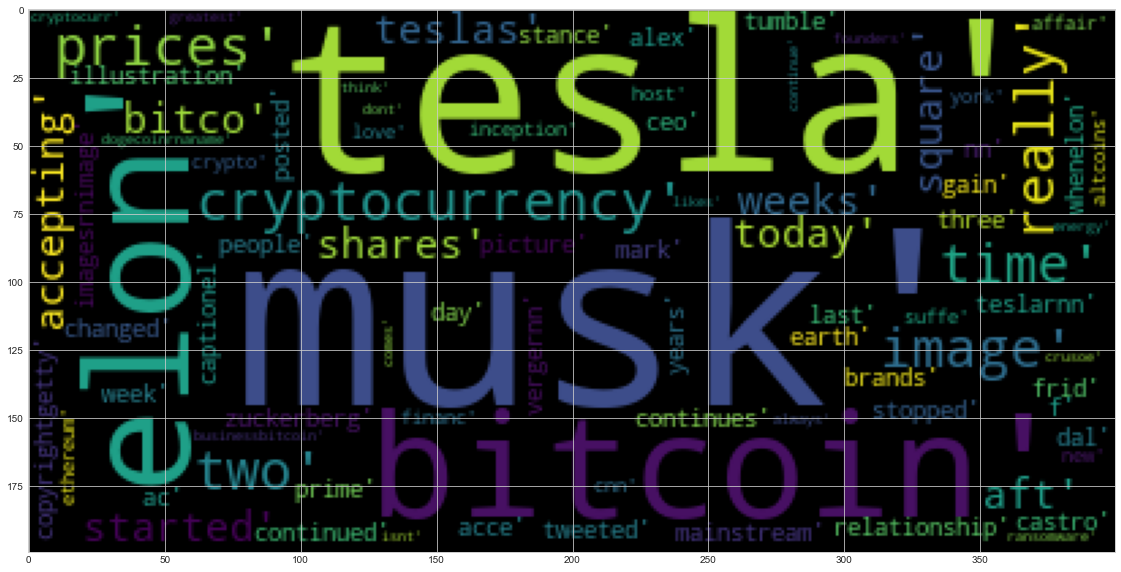

In [142]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_btc = WordCloud().generate(result_btc)
plt.imshow(wc_btc)

In [143]:
result_eth = str(result_eth)

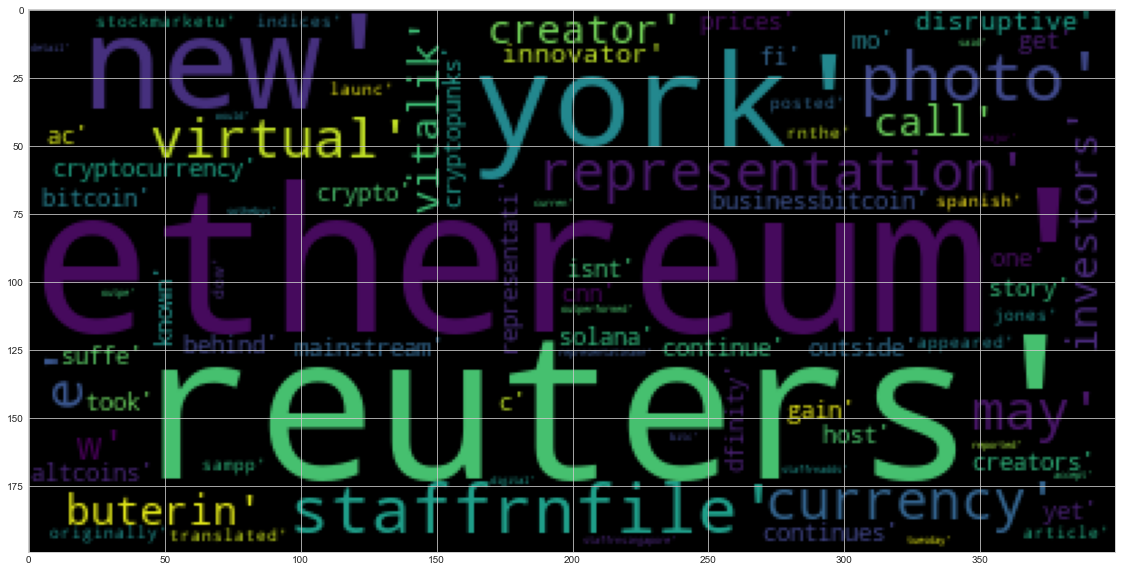

In [144]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_eth = WordCloud().generate(result_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [145]:
import spacy
from spacy import displacy

In [146]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [147]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [149]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_all_articles = btc_df.text.str.cat(sep=' ')

In [150]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_btc = nlp(btc_all_articles)
# Add a title to the document
# YOUR CODE HERE!


In [151]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_btc, style='ent')

In [95]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc_btc.ents])

['Just weeks', 'Tesla', 'Bitcoin', 'Elon Musk', 'more than 6%', 'today', 'American', '$5.06 billion', '2021', '3.36', 'CFO', 'Zach Kirkhorn', 'Monday', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'Tesla', 'Elon Musk', 'Friday', 'Bitcoin', '50,000', 'first', 'early March', 'Bitcoin', 'Mark Zuckerberg', 'two', 'Max', 'Bitcoin', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Last week', 'Musk', 'Dogecoin', 'Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'Musk', 'Tesla', 'Tesla', 'first quarter', '$438m', '315', 'Bitcoin', '] Earth Day', 'Jack Dorsey', 'Three years', 'Babel Finance', 'Monday', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'hours-long', 'this morning', 'May 19th', 'more than 5,500 miles', 'the United States', 'two', 'Crusoe

---

### Ethereum NER

In [152]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_all_articles = eth_df.text.str.cat(sep=' ')

In [153]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_eth = nlp(eth_all_articles)
# Add a title to the document
# YOUR CODE HERE!

In [154]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_eth, style='ent')

In [155]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc_eth.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'North Carolina', 'Josh Stein', 'Madison Campbell', 'Liesel Vaidya', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'Solana', 'Anatoly Yakovenko', 'New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Reuters', 'February 19, 2021', 'SINGAPORE', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dfinity', 'July 2018', 'Swiss', 'Dominic Williams', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Spanish', 'AI', 'Cryptocurrencies', 'today', 'Vitalik Buterin', '27-year-old', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dow Jones Indices', 'Reuters', 'SINGAPORE', 'May 3', 'Reuters', 'Monday', '3,000', 'last weeks', 'Europe', "Sotheby's", 'Tuesday', 'Banksy', '

---